In [15]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%run practicalDefinitions.py
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
X, Y = loadData()

In [17]:
print (X[0])

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

In [18]:
print (Y[0,0])
print (Y[-1,0])

0
9


In [36]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(Y.shape))

The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


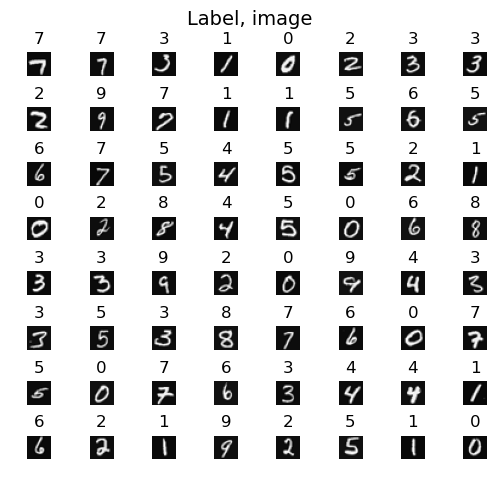

In [90]:
m, n = X.shape
fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])
for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X[random_index].reshape((20,20)).T
    ax.imshow(X_random_reshaped, cmap='gray')
    ax.set_title(Y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [48]:
model = Sequential([               
        tf.keras.layers.Input(shape=(400,)),
        Dense(25,activation ="relu",name="l1"),
        Dense(15,activation ="relu",name="l2"),
        Dense(10,activation ="linear",name="l3"),      
    ], name = "Arshia")

In [49]:
model.summary()

Model: "Arshia"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ l1 (Dense)                           │ (None, 25)                  │          10,025 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ l2 (Dense)                           │ (None, 15)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ l3 (Dense)                           │ (None, 10)                  │             160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,575 (41.31 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
[layer1, layer2, layer3] = model.layers

In [51]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()

In [53]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
history = model.fit(X,Y,epochs=40)

Epoch 1/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - loss: 1.9680
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - loss: 0.7138
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 0.4347
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 0.3428
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - loss: 0.2895
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 0.2528
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - loss: 0.2257
Epoch 8/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - loss: 0.2043
Epoch 9/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 0.1869
Epoch 10/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 0.1723
Epoch 11/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 0.1594
Epoch 12/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 0.1480
Epoch 13/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 0.1377
Epoch 14/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - loss: 0.1284
Epoch 15/40
157/157 ━━━━━━━━━

In [82]:
prediction = model.predict(X[3415].reshape(1,400)) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [83]:
print(f" predicting : \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

 predicting : 
[[-13.866797   -4.3794556  -3.216365   -5.8501334  -9.32176     1.7804052
    8.759115  -22.721355    2.3013241 -18.611374 ]]
 Largest Prediction index: 6


In [84]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[1.4880015e-10 1.9629224e-06 6.2809736e-06 4.5101984e-07 1.4011593e-08
  9.2917302e-04 9.9749774e-01 2.1238181e-14 1.5643314e-03 1.2943734e-12]]
Total of predictions: 1.000


In [85]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 6


Comparsion of label vs yhat :

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━

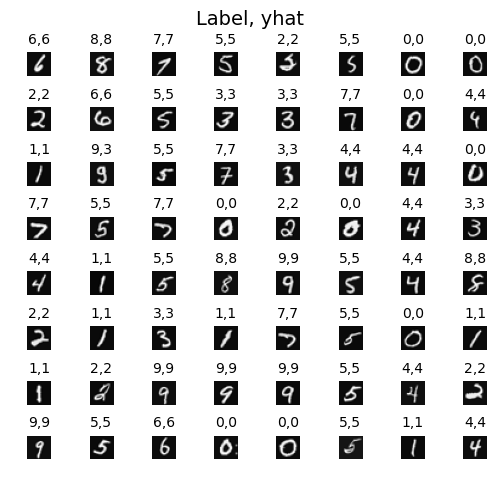

In [89]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])
for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X[random_index].reshape((20,20)).T
    ax.imshow(X_random_reshaped, cmap='gray')
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    ax.set_title(f"{Y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()